In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
setup_checkpoint = 1

100.0

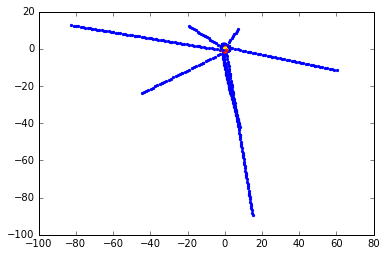

In [26]:
#add particles to simulation and send them out into space
if setup_checkpoint == 1:
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(m=1e-4,a=1.)

    Np = 10
    tmax = 100
    times = np.linspace(0.5,tmax,Np)
    prad = 1e-4                                 #planet radius
    ev = 1.5*np.sqrt(2*sim.particles[1].m/prad)  #escape velocity
    mp = 1e-11

    for i in xrange(0,Np):
        phi = np.random.random()*np.pi*2
        x = 1.*sim.particles[1].x + prad*np.cos(phi)
        y = 1.*sim.particles[1].y + prad*np.sin(phi)
        vx = ev*np.cos(phi)
        vy = ev*np.sin(phi)
        sim.add(m=mp, x=x, y=y, vx=vx, vy=vy)
        tsteps = np.linspace(sim.t,times[i],10)
        for t in tsteps:
            sim.integrate(t)
            plt.scatter(sim.particles[0].x,sim.particles[0].y,color='yellow',s=20)
            plt.scatter(sim.particles[1].x,sim.particles[1].y,color='red',s=8)
            for p in sim.particles[2:]:
                plt.scatter(p.x,p.y,color='blue',s=5)
        sys.stdout.write("\r" + str(sim.t))
        sys.stdout.flush()
    sim.save("ReverseCollisions.bin")
    del sim

In [27]:
#now load it and integrate backwards to have collisions
sim = rebound.Simulation.from_file("ReverseCollisions.bin")
sim.integrator='hybarid'
sim.collisions_track_dE = 1
sim.collision = 'direct'
sim.collision_resolve = 'merge'
sim.testparticle_type = 1
sim.dt = -0.0001
sim.ri_hybarid.switch_radius = 6
sim.ri_hybarid.CE_radius = 20
sim.N_active = 2
sim.move_to_com()

0.0

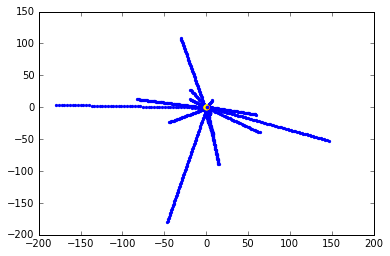

In [28]:
#reverse integrate
E0 = sim.calculate_energy()
dE = np.zeros(0)
times = np.linspace(sim.t-0.1,0,0.01/abs(sim.dt))
for t in times:
    sim.integrate(t)
    Ei = sim.calculate_energy() + sim.collisions_dE
    dE = np.append(dE,(Ei-E0)/E0)
    plt.scatter(sim.particles[0].x,sim.particles[0].y,color='yellow',s=20)
    plt.scatter(sim.particles[1].x,sim.particles[1].y,color='red',s=8)
    for p in sim.particles[2:]:
        plt.scatter(p.x,p.y,color='blue',s=5)
    sys.stdout.write("\r" + str(sim.t))
    sys.stdout.flush()

In [29]:
#afterward
sim.status()

---------------------------------
REBOUND version:     	2.14.1
REBOUND built on:    	Apr  7 2016 09:30:47
Number of particles: 	12
Selected integrator: 	hybarid
Simulation time:     	0.000000
Current timestep:    	-0.000100
---------------------------------
<rebound.Particle object, id=0 m=1.0 x=-9.99892930224e-05 y=2.3244271543e-08 z=0.0 vx=-2.16187261011e-08 vy=-9.99950869588e-05 vz=0.0>
<rebound.Particle object, id=0 m=0.0001 x=0.999898356495 y=-0.000216633839837 z=0.0 vx=0.000216041015461 vy=0.999950347975 vz=0.0>
<rebound.Particle object, id=0 m=1e-11 x=0.999899969788 y=-0.000122688892795 z=0.0 vx=1.18501940587 vy=1.97482117817 vz=0.0>
<rebound.Particle object, id=0 m=1e-11 x=1.54830891808 y=-0.0374959191033 z=0.0 vx=-1.20175200671 vy=1.05317069967 vz=0.0>
<rebound.Particle object, id=0 m=1e-11 x=3.46442622287 y=-16.3061262546 z=0.0 vx=-0.292994536696 vy=1.34845997465 vz=0.0>
<rebound.Particle object, id=0 m=1e-11 x=-18.8365706113 y=27.6592505149 z=0.0 vx=0.827060079669 vy=-1.1868

[  4.40457353e-14  -6.93889737e-14  -3.79470950e-15   5.47522371e-14
   3.53721136e-14   7.08797525e-14  -7.27771072e-14  -3.12114857e-13
  -4.77049194e-14  -4.33681086e-14  -4.25549566e-14  -5.59719651e-14
  -1.40946353e-14  -1.08284746e-13  -9.96111244e-14  -6.20706054e-14
  -1.03676885e-13  -1.08826847e-13   3.87737996e-13   2.37846971e-13
   4.16740418e-13   1.47993671e-13   1.48806823e-13   1.77538195e-13
   1.49755500e-13   8.83625213e-14   3.66867094e-13   4.26362718e-13
   3.91668231e-13   3.90855079e-13   5.57415721e-13   3.80555153e-13
   1.82823683e-13   1.43656860e-13   1.68322471e-13   1.94072286e-13
   1.99222249e-13   2.24836538e-13   1.75776365e-13   1.89328899e-13
  -1.01644005e-14  -1.79977651e-13  -1.41217404e-13  -1.34847713e-13
  -1.49213399e-13  -2.20499727e-13  -1.42301606e-14   1.80384227e-13
   2.60344177e-13   5.40746104e-13   4.03729986e-13   3.91803756e-13
   3.81097254e-13   3.78386747e-13   4.38966574e-13   4.14572013e-13
   4.77726821e-13   4.67155845e-13

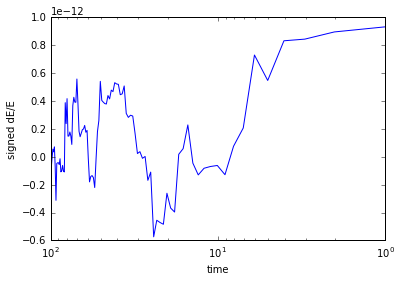

In [30]:
plt.plot(times,dE)
#print(dE)
plt.gca().invert_xaxis()
plt.xscale('log')
plt.xlabel('time')
plt.ylabel('signed dE/E')